# Prepare the Data

In [248]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = Path("Starter_Code", "Pymaceuticals", "data", "Mouse_metadata.csv")
study_results_path =  Path("Starter_Code", "Pymaceuticals", "data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [249]:
#The number of unique mouse IDs
len(combined['Mouse ID'].unique())

249

In [250]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined[combined.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicate_ids = duplicate['Mouse ID'].unique()
duplicate_ids


array(['g989'], dtype=object)

In [251]:
# Optional: Get all the data for the duplicate mouse ID. 
deleted_df = combined[combined['Mouse ID'] == duplicate_ids[0]]
deleted_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [252]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = combined[combined['Mouse ID'] != duplicate_ids[0]]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [253]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'].unique())

248

# Summary Statistics

In [254]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drugs = df['Drug Regimen'].unique()
TV = df.groupby('Drug Regimen')['Tumor Volume (mm3)']

MTV = TV.mean()
MedianTV = TV.median()
TVVariance = TV.var()
TVstddev = TV.std()
TVsem = TV.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': MTV, 'Median Tumor Volume': MedianTV,
                          'Tumor Volume Variance': TVVariance, 'Tumor Volume Std. Dev.': TVstddev,
                          'Tumor Volume Std. Err.': TVsem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts


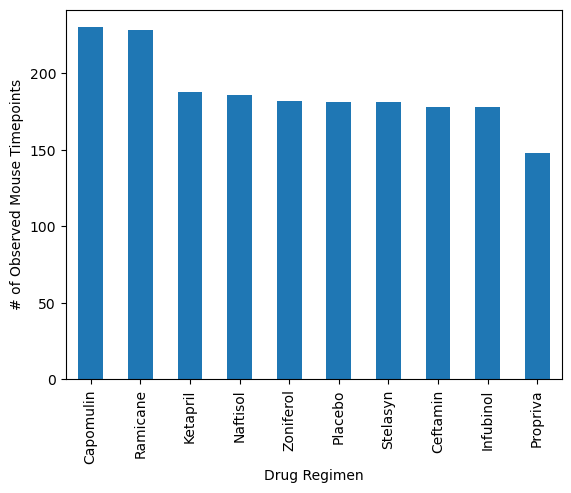

In [255]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped = df.groupby('Drug Regimen')
Count_Rows = grouped['Mouse ID'].count().sort_values(ascending=False)

figure1 = Count_Rows.plot(kind='bar')
figure1.set_xlabel('Drug Regimen')
figure1.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

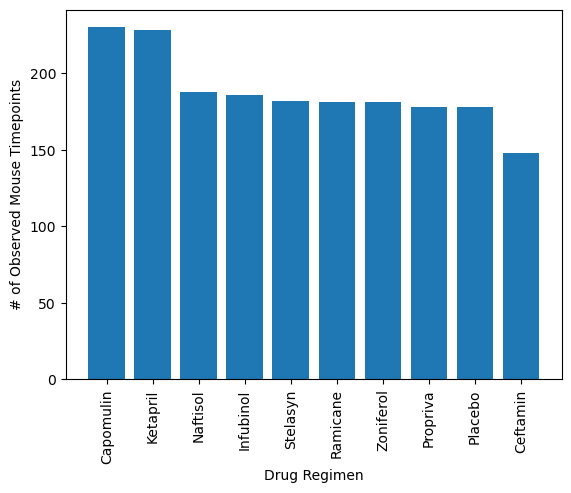

In [256]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drugs
y_axis = grouped['Mouse ID'].count().sort_values(ascending=False)

plt.bar(x_axis, y_axis)
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

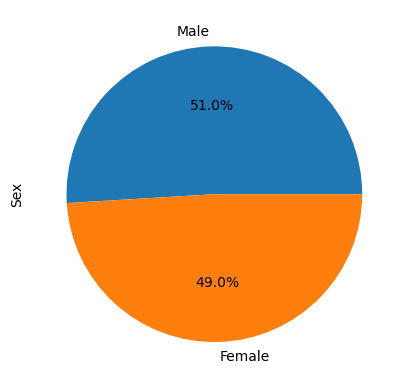

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_df = df['Sex'].value_counts()
Sex_df.plot(kind='pie', autopct='%1.1f%%')
plt.show()

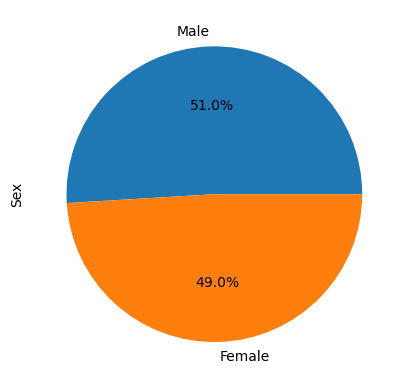

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = [x for x in Sex_df.index]
output = [x for x in Sex_df]

plt.pie(output, labels = labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers, and Box Plots

In [259]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = df.groupby('Mouse ID')['Timepoint'].max()
max_timepoints
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxed_df = pd.merge(df, max_timepoints, on=['Mouse ID', 'Timepoint'], how = 'right')
maxed_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [260]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for drug in treatments:
    final_tumor_volumes = maxed_df.loc[maxed_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_volumes)
    
# Capomulin Outliers 
Cap_Outliers = []

Capomulin_Quants = tumor_vol_data[0].quantile([0.25,0.5,0.75])
lower_Cap = Capomulin_Quants[0.25]
upper_Cap = Capomulin_Quants[0.75]
IQR = upper_Cap - lower_Cap

UB_Cap = upper_Cap + (1.5 * IQR)
LB_Cap = lower_Cap - (1.5 * IQR)

for x in tumor_vol_data[0]:
    if (x > UB_Cap) or (x < LB_Cap):
        Cap_Outliers.append(x)

# Ramicane Outliers
Ram_Outliers = []

Ramicane_Quants = tumor_vol_data[1].quantile([0.25,0.5,0.75])
lower_Cap = Ramicane_Quants[0.25]
upper_Cap = Ramicane_Quants[0.75]
IQR = upper_Cap - lower_Cap

UB_Cap = upper_Cap + (1.5 * IQR)
LB_Cap = lower_Cap - (1.5 * IQR)

for x in tumor_vol_data[1]:
    if (x > UB_Cap) or (x < LB_Cap):
        Ram_Outliers.append(x)

# Infubinol Outliers

Inf_Outliers = []

Infubinol_Quants = tumor_vol_data[2].quantile([0.25,0.5,0.75])
lower_Cap = Infubinol_Quants[0.25]
upper_Cap = Infubinol_Quants[0.75]
IQR = upper_Cap - lower_Cap

UB_Cap = upper_Cap + (1.5 * IQR)
LB_Cap = lower_Cap - (1.5 * IQR)

for x in tumor_vol_data[2]:
    if (x > UB_Cap) or (x < LB_Cap):
        Inf_Outliers.append(x)


Inf_Outliers

# Ceftamin Outliers

Cef_Outliers = []

Ceftamin_Quants = tumor_vol_data[3].quantile([0.25,0.5,0.75])
lower_Cap = Ceftamin_Quants[0.25]
upper_Cap = Ceftamin_Quants[0.75]
IQR = upper_Cap - lower_Cap

UB_Cap = upper_Cap + (1.5 * IQR)
LB_Cap = lower_Cap - (1.5 * IQR)

for x in tumor_vol_data[3]:
    if (x > UB_Cap) or (x < LB_Cap):
        Cef_Outliers.append(x)

# Print the potential outliers
if not Cap_Outliers:
    print(f"Capomulin has no potential outliers")
else:
    print(f"Capomulin's potential outliers:{Cap_Outliers}")

if not Ram_Outliers:
    print(f"Ramicane has no potential outliers")
else:
    print(f"Ramicane's potential outliers:{Ram_Outliers}")
    
if not Inf_Outliers:
    print(f"Infubinol has no potential outliers")
else:
    print(f"Infubinol's potential outliers:{Inf_Outliers}")

if not Cef_Outliers:
    print("Ceftamin has no potential outliers")
else:
    print(f"Ceftamin's potential outliers:{Cef_Outliers}")

Capomulin has no potential outliers
Ramicane has no potential outliers
Infubinol's potential outliers:[36.3213458]
Ceftamin has no potential outliers


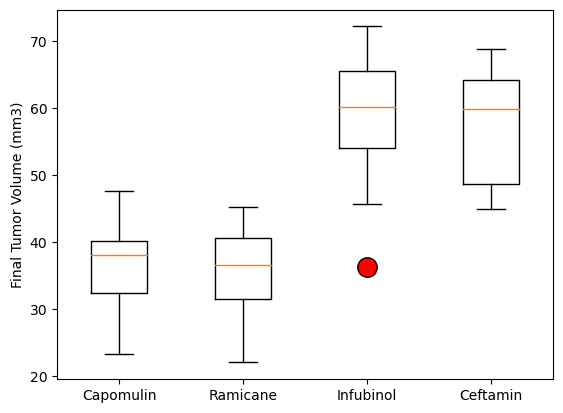

In [261]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor='red', marker='o', markersize=14)
plt.boxplot(tumor_vol_data, labels = treatments, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

# Line and Scatter Plots

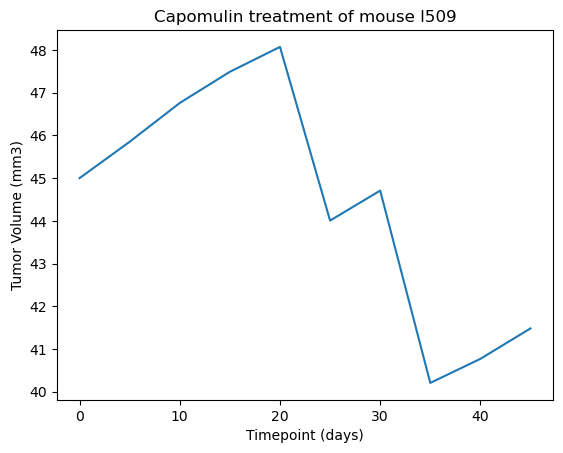

In [262]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Example_df = df[df['Mouse ID'] == 'l509']
y_axis = Example_df['Tumor Volume (mm3)']
x_axis = Example_df['Timepoint']

plt.plot(x_axis, y_axis)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

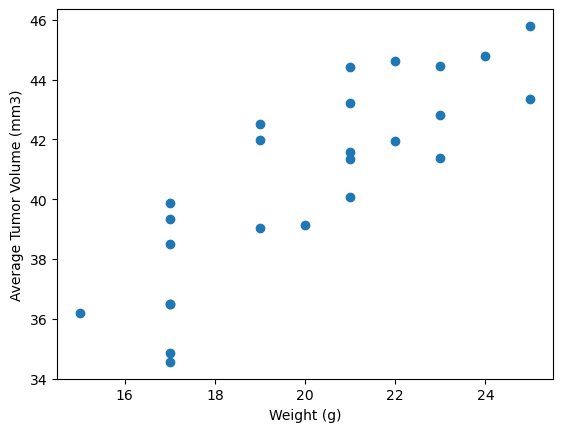

In [263]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Example_df2 = df[df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = Example_df2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = Example_df2.groupby('Mouse ID')['Weight (g)'].mean()

x_axis = mouse_weight
y_axis = avg_tumor_volume

plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


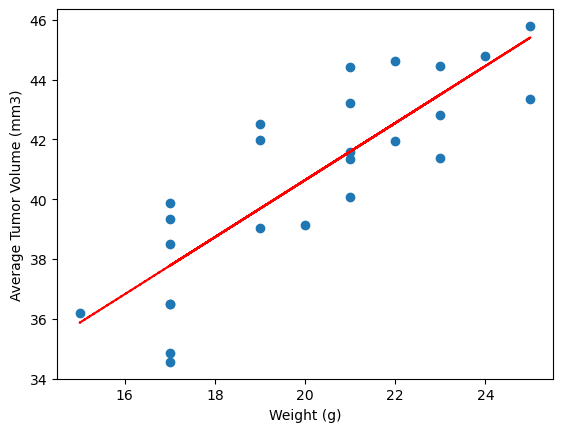

In [264]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Linear Regression Variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_volume)

# Expected Ouput
regress_values = mouse_weight * slope + intercept 

# Line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Lin Reg
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regress_values, '--', c='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Print Correlation info
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation, 2)}")